In [1]:
from sklearn.linear_model import SGDClassifier
from datetime import datetime, timedelta
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [3]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [4]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [5]:
best_loss = 'hinge'
best_alpha = 0.01
best_classifier = sgd = SGDClassifier(loss=best_loss,alpha=best_alpha,random_state=0).fit(normalizedTrainFeatures,train_labels)
prev_predict = best_classifier.predict(normalizedTrainFeatures)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [9]:
def acc(data, labels, loss, alpha):
    global best_loss,best_alpha,best_classifier,prev_predict
    t0 = datetime.now()
    sgd = SGDClassifier(loss=loss, alpha=alpha, random_state=0).fit(data, labels)
    predictions = sgd.predict(data)
    if(m.accuracy_score(labels,predictions) > m.accuracy_score(labels,prev_predict)):
        prev_predict = predictions
        best_classifier = sgd
        best_loss = loss
        best_alpha = alpha
    tn = datetime.now() - t0
    tn = tn - timedelta(microseconds=tn.microseconds)
    return (loss, alpha, m.accuracy_score(labels, predictions), tn)

In [11]:
loss_vector = ['hinge', 'log_loss', 'modified_huber']
alpha_vector = [0.00001,0.0001, 0.001, 0.01]
scores = [acc(normalizedTrainFeatures, train_labels, loss, alpha) for loss in loss_vector for alpha in alpha_vector]
for i, score in enumerate(scores):
    print("Loss = " + str(score[0]) + ", Alpha = " + str(score[1]) + ", Accuracy = " + str(score[2]) + ", Time = " + str(score[3]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Loss = hinge, Alpha = 1e-05, Accuracy = 0.6758625, Time = 0:00:01
Loss = hinge, Alpha = 0.0001, Accuracy = 0.6745, Time = 0:00:00
Loss = hinge, Alpha = 0.001, Accuracy = 0.6669, Time = 0:00:00
Loss = hinge, Alpha = 0.01, Accuracy = 0.6323875, Time = 0:00:00
Loss = log_loss, Alpha = 1e-05, Accuracy = 0.6890875, Time = 0:00:01
Loss = log_loss, Alpha = 0.0001, Accuracy = 0.6981, Time = 0:00:00
Loss = log_loss, Alpha = 0.001, Accuracy = 0.6960125, Time = 0:00:00
Loss = log_loss, Alpha = 0.01, Accuracy = 0.657325, Time = 0:00:00
Loss = modified_huber, Alpha = 1e-05, Accuracy = 0.6346625, Time = 0:00:01
Loss = modified_huber, Alpha = 0.0001, Accuracy = 0.6859625, Time = 0:00:00
Loss = modified_huber, Alpha = 0.001, Accuracy = 0.683225, Time = 0:00:00
Loss = modified_huber, Alpha = 0.01, Accuracy = 0.6847625, Time = 0:00:00


C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [13]:
sgd = best_classifier
predictions = sgd.predict(normalizedTestFeatures)
probs = sgd.predict_proba(normalizedTestFeatures)
probs = pd.DataFrame(probs)
probs = probs.apply(lambda x: max(x[0],x[1]), axis=1)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [14]:
acc = m.accuracy_score(test_labels, predictions)
prec = m.precision_score(test_labels, predictions)
recall = m.recall_score(test_labels, predictions)
f1 = m.f1_score(test_labels,predictions)
auc = m.roc_auc_score(test_labels,probs)
print("Accuracy score: " + str(acc))
print("Precision score: " + str(prec))
print("Recall score: " + str(recall))
print("F1 score: ", f1)
print("AUC-ROC: ", auc)

Accuracy score: 0.6935153242337883
Precision score: 0.7328835582208896
Recall score: 0.36690017513134854
F1 score:  0.4889963321107037
AUC-ROC:  0.40989908959578436


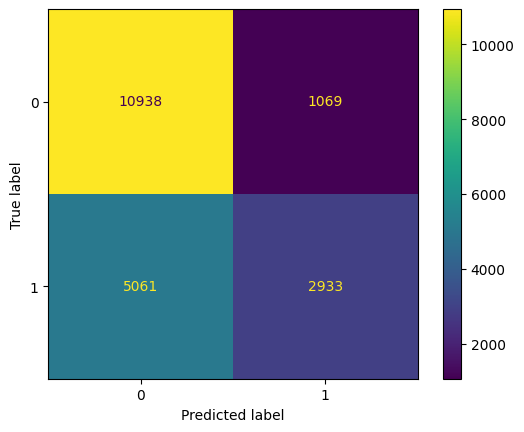

In [15]:
m.ConfusionMatrixDisplay(m.confusion_matrix(test_labels, predictions)).plot()

In [16]:
import pickle
with open('trained_models/sgd.pkl','wb') as f:
    pickle.dump(sgd,f)
print("Model dump complete!")

Model dump complete!
